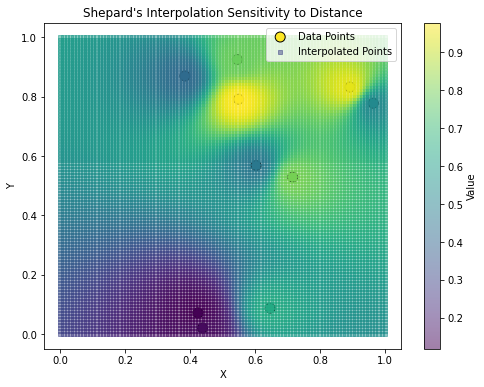

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Function to apply Shepard's method for interpolation
def shepards_interpolation(xi, yi, zi, x, y, power=3):
    # Calculate the distance matrix
    dists = distance_matrix(np.column_stack((x, y)), np.column_stack((xi, yi)))
    # Avoid division by zero
    dists[dists == 0] = np.nan
    # Calculate weights
    weights = 1 / dists**power
    # Compute interpolated values
    z = np.nansum(weights * zi, axis=1) / np.nansum(weights, axis=1)
    return z

# Generate random sample data
np.random.seed(0)
xi = np.random.rand(10)
yi = np.random.rand(10)
zi = np.random.rand(10)

# Generate grid for interpolation
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xv, yv = np.meshgrid(x, y)
xv, yv = xv.flatten(), yv.flatten()

# Apply Shepard's interpolation
zv = shepards_interpolation(xi, yi, zi, xv, yv)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(xi, yi, c=zi, marker='o', s=100, label='Data Points', edgecolors='k')
plt.scatter(xv, yv, c=zv, marker='s', s=20, label='Interpolated Points', alpha=0.5)
plt.colorbar(label='Value')
plt.title("Shepard's Interpolation Sensitivity to Distance")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Inverse Distance Weighting (IDW) is a method used for interpolating values at unknown points based on values from known points. The fundamental idea behind IDW is that the estimated value at an unknown point should be influenced more by closer known points than by those farther away. This influence typically decreases with distance.

The IDW interpolated value $I(x)$ at a point $x$ can be computed using the formula:

$$
I(x) = \frac{\sum_{i=1}^{n} \frac{1}{d(x, x_i)^p} \cdot y_i}{\sum_{i=1}^{n} \frac{1}{d(x, x_i)^p}}
$$

where:
- $n$ is the number of known points,
- $x_i$ are the known points,
- $y_i$ are the values at the known points,
- $d(x, x_i)$ is the distance between the unknown point $x$ and a known point $x_i$,
- $p$ is a power parameter that determines how quickly the influence of known points decreases with distance. A larger value of $p$ gives greater influence to nearer points.

In the case of 1-D interpolation, the distance $d(x, x_i)$ is simply the absolute difference between $x$ and $x_i$:

$$
d(x, x_i) = |x - x_i|
$$

It's important to handle the case where the unknown point $x$ coincides with one of the known points $x_i$. In this scenario, the interpolated value $I(x)$ should be exactly equal to the value at the known point, $y_i$.

Shepard's method for smoothing is a specific implementation of IDW interpolation where the power parameter $p$ is typically set to 2, although it can be adjusted for different smoothing effects.
